In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [3]:
from pathlib import Path
from datetime import datetime

current_year = datetime.now().year -1 # As the current year will have less data present creating a Bias
ROOTPATH = Path().absolute().parent
DATAPATH = ROOTPATH/ 'data' / 'processed'
dfs = []

def load_recent_data():
    """
    Loads last 8 years of data for initial exploration

    Returns:
    pd.DataFrame: Dataframe containing 8 years of data 
    """
    years = range(current_year-7,current_year+1)
    for year in years:
        df = pd.read_csv(f'{DATAPATH}/chicago_crimes_{year}_processed.csv',
                         parse_dates=['date','updated_on'])
        dfs.append(df)
    return pd.concat(dfs,ignore_index=True)

df = load_recent_data()
print(f'Loaded {len(df)} records')

Loaded 1981493 records


In [4]:
df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'year', 'updated_on',
       'latitude', 'longitude', 'month', 'day', 'hour', 'day_of_week',
       'time_of_day', 'has_location'],
      dtype='object')

/tmp/ipykernel_171657/499599338.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample("M").size()


<Axes: title={'center': 'Monthly Crime Incidents in Chicago'}, xlabel='date'>

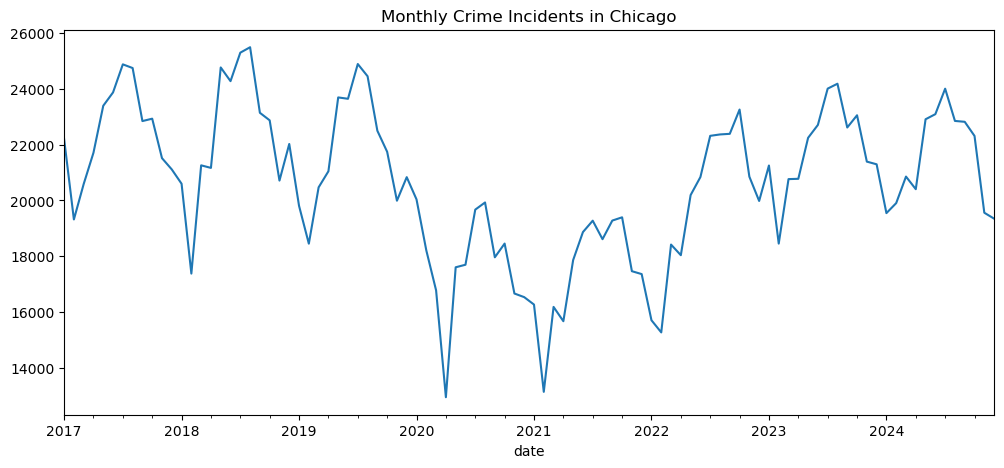

In [9]:
df.set_index("date", inplace=True)
df_monthly = df.resample("M").size()
df_monthly.plot(figsize=(12, 5), title="Monthly Crime Incidents in Chicago")


In [12]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_monthly)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")  # If p < 0.05, data is stationary


ADF Statistic: -1.603869928086878
p-value: 0.48164920739183964


In [13]:
df_monthly_diff = df_monthly.diff().dropna()

In [14]:
model = ARIMA(df_monthly, order=(2,1,2))  # Order (p,d,q) -> Tune later
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   96
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -832.065
Date:                Mon, 17 Mar 2025   AIC                           1674.130
Time:                        13:48:17   BIC                           1686.900
Sample:                    01-31-2017   HQIC                          1679.290
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1958      0.471     -0.415      0.678      -1.120       0.728
ar.L2         -0.2312      0.269     -0.858      0.391      -0.759       0.297
ma.L1          0.0489      0.459      0.107      0.9

In [15]:
forecast = model_fit.forecast(steps=6)

/tmp/ipykernel_171657/4080238532.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df_monthly.index[-1], periods=6, freq="M"), forecast, label="Forecast", linestyle="dashed")


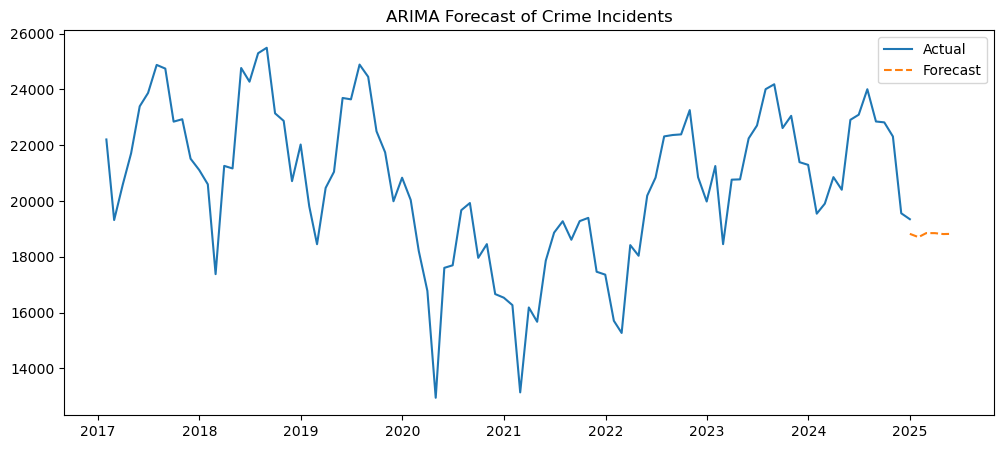

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df_monthly, label="Actual")
plt.plot(pd.date_range(df_monthly.index[-1], periods=6, freq="M"), forecast, label="Forecast", linestyle="dashed")
plt.legend()
plt.title("ARIMA Forecast of Crime Incidents")
plt.show()
